In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("placement.csv")
df.head()
df.shape

(200, 2)

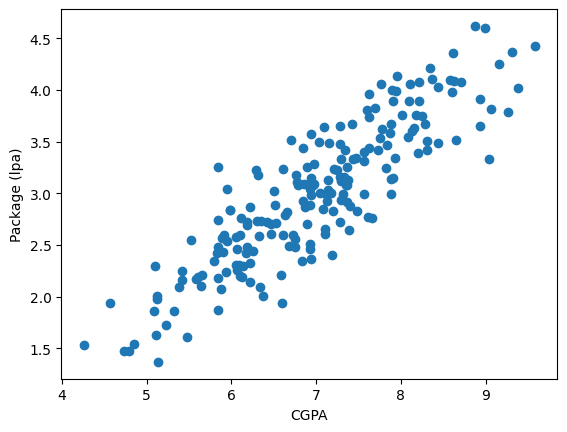

In [51]:
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("CGPA")
plt.ylabel("Package (lpa)")
plt.show()

In [52]:
x= df.iloc[:,0:1]
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [53]:
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [59]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
Name: package, dtype: float64

In [80]:
lr.predict(x_test.iloc[5].values.reshape(1,1))

c:\Users\Nikhil Pathak\OneDrive\Desktop\Python coding\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.76317679])

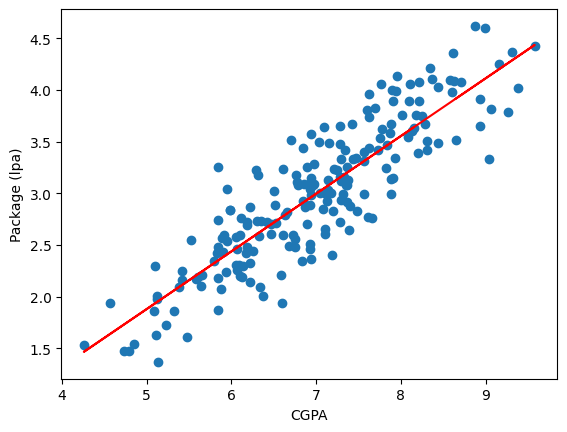

In [70]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_train,lr.predict(x_train),color = "red")
plt.xlabel("CGPA")
plt.ylabel("Package (lpa)")
plt.show()

In [72]:
m = lr.coef_
m

array([0.55807562])

In [73]:
b = lr.intercept_
b

np.float64(-0.9100054519150222)

In [75]:
class reg:
    def train(self):
        self.m = None
        self.b = None
    def fit(self,x_train,y_train):
        num = 0
        den = 0
        for i in range(x_train.shape[0]):
            num += (x_train.iloc[i] - x_train.mean())*(y_train.iloc[i] - y_train.mean())
            den += (x_train.iloc[i] - x_train.mean())*(x_train.iloc[i] - x_train.mean())
        self.m = num/den
        self.b = y_train.mean() - (x_train.mean()*self.m)
    def pred(self,x_test):
        return (self.m*x_test) + self.b
            

In [76]:
meralr = reg()

In [82]:
meralr.fit(x_train,y_train)

In [84]:
meralr.pred(x_test.iloc[5])

cgpa    1.763177
dtype: float64

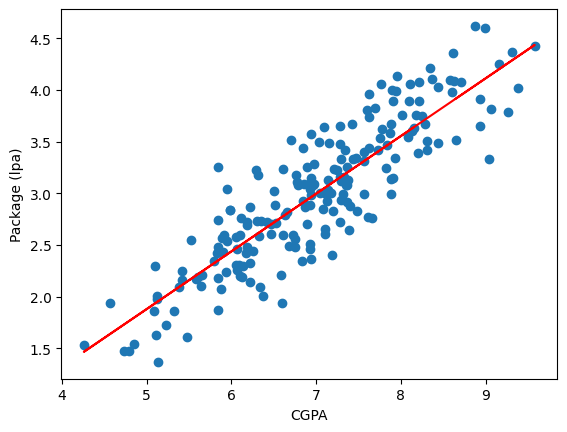

In [85]:
plt.scatter(df["cgpa"],df["package"])
plt.plot(x_train,meralr.pred(x_train),color = "red")
plt.xlabel("CGPA")
plt.ylabel("Package (lpa)")
plt.show()